 ## EELT 7023 - Tópicos Especiais em Identificação de Sistemas

#### Aluno: 

### $$\textbf{Exercício 3}$$

$\textbf{Objetivo:}$ Escrever um algoritmo capaz de reproduzir os resultados apresentados na Videoaula 5.

Função considerada como "sistema"

$$y(t) = tan \left(0,45\pi u_0(t)\right)$$

onde $u_0(t)$ é um vetor de $100$ valores linearmente espaçados entre $0$ e $1$

$\textbf{Resolução:}$ Primeiramente foram inicializados os vetores $u_0(t)$ e $y(t)$ que assumem valores que não variam ao longo deste exercício.

In [1]:
# Inicializando u_0 e y
u_0 = Array(range(0, 1, length=100));
y = tan.(0.45*pi*u_0);

# Função para criar a matriz M
function cria_M(ordem, u)
    M = Array{Float64, 2}(undef, length(u), ordem+1);
    M[:, 1] .= 1;
    for i=2:ordem+1
            M[:, i] = M[:, i-1] .* u;
    end
    return M
end

cria_M (generic function with 1 method)

Em seguida foi definida uma função que realiza a estimação do vetor $\theta^*$ pelo método dos mínimos quadrados utilizando a solução instável.

In [2]:
function mmq_instavel(ordem, u, y)
    # Inicialização da matriz M
    M = cria_M(ordem, u);
    
    # Cálculo de theta*
    theta = inv(M' * M) * M' * y;
    return theta
end

mmq_instavel (generic function with 1 method)

Além disso, foi definida uma função para a solução estável do método dos mínimos quadrados

In [3]:
function mmq_estavel(ordem, u, y)
    # Inicialização da matriz M
    M = cria_M(ordem, u);
    
    # Cálculo de theta*
    theta = M \ y
    return theta
end

mmq_estavel (generic function with 1 method)

Para avaliar se a função foi implementada corretamente ela será executada para alguns valores de $n$ a fim de permitir comparação com os resultados originais de $\theta^*$ apresentados durante a aula

In [4]:
for i=(1,3,5)
    println(i, " : ", mmq_instavel(i, u_0, y))
end

1 : [-0.7169649332887863, 4.096226048105672]
3 : [-0.28117048630462554, 6.244675711983823, -16.42106095584056, 15.805597856878862]
5 : [-0.08725206064812668, 4.9779364903166154, -31.28193923233934, 103.07189511593418, -139.6201244671767, 68.97550071631483]


Foi possível notar que os valores permaneceram próximos aos apresentados durante a aula, desconsiderando a diferença de casas decimais.

A seguir foram plotados os gráficos para os modelos de ordem 1 a 20 considerando tanto a solução instável quanto a estável.

In [5]:
# Dataframes para organizar melhor os resultados de MSE, RMSE e R2
using DataFrames
using Statistics

In [6]:
# Função para obter y_chapeu
function get_y_chapeu(ordem, u, y, estavel)
    M = cria_M(ordem, u);
    
    if estavel
        theta = mmq_estavel(ordem, u, y);
    else
        theta = mmq_instavel(ordem, u, y);
    end
    
    return M * theta
end

get_y_chapeu (generic function with 1 method)

In [7]:
function funcao_objetivo(y, y_chapeu)
    return mean((y - y_chapeu).^2)
end

funcao_objetivo (generic function with 1 method)

In [8]:
function coeficiente_R2(y, y_chapeu)
    y_mean = mean(y);
    
    R2 = 1 - sum((y - y_chapeu).^2) / sum((y .- y_mean).^2);
    return R2 * 100
end

coeficiente_R2 (generic function with 1 method)

In [9]:
# Biblioteca necessária para plotar gráficos
using Plots
pyplot()

Plots.PyPlotBackend()

In [10]:
ordem_total = 50;
estavel = DataFrame(erro_MS = zeros(ordem_total), erro_RMS = zeros(ordem_total), coef_R2 = zeros(ordem_total));
instavel = DataFrame(erro_MS = zeros(ordem_total), erro_RMS = zeros(ordem_total), coef_R2 = zeros(ordem_total));
my_plots = Array{Any, 1}(undef, ordem_total);

for i = 1:ordem_total
    # Dados solução estável
    y_estavel = get_y_chapeu(i, u_0, y, true);
    
    estavel[i, :erro_MS]  = funcao_objetivo(y, y_estavel);
    estavel[i, :erro_RMS] = sqrt(estavel[i, :erro_MS]);
    estavel[i, :coef_R2]  = coeficiente_R2(y, y_estavel);
    
    # Dados solução instável
    y_instavel = get_y_chapeu(i, u_0, y, false);
    
    instavel[i, :erro_MS]  = funcao_objetivo(y, y_instavel);
    instavel[i, :erro_RMS] = sqrt(instavel[i, :erro_MS]);
    instavel[i, :coef_R2]  = coeficiente_R2(y, y_instavel);
    
    my_plots[i] = plot(u_0, y, title = "Modelo de ordem $i", label="Sistema real", ylims = (0,7))
    plot!(u_0, y_estavel, label="Solução estável")
    plot!(u_0, y_instavel, label="Solução instável", linestyle=:dash)
end

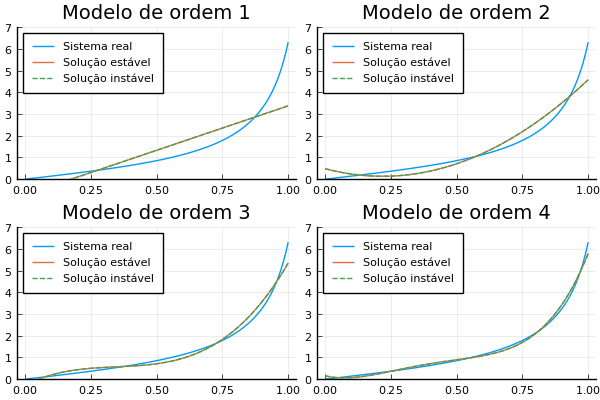

In [11]:
my_plots = Tuple(my_plots)
plot(my_plots[1], 
    my_plots[2], 
    my_plots[3], 
    my_plots[4],  
    layout=(2,2))

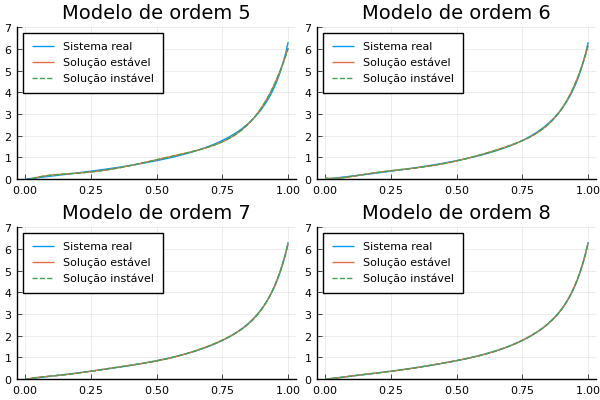

In [12]:
plot(my_plots[5], 
    my_plots[6], 
    my_plots[7], 
    my_plots[8], layout=(2,2))

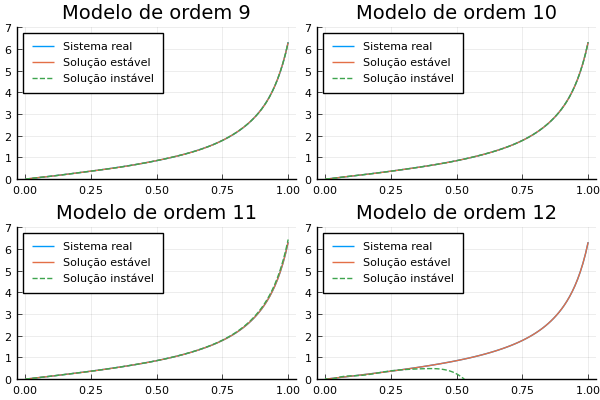

In [13]:
my_plots = Tuple(my_plots)
plot(my_plots[9], 
    my_plots[10], 
    my_plots[11], 
    my_plots[12], layout=(2,2))

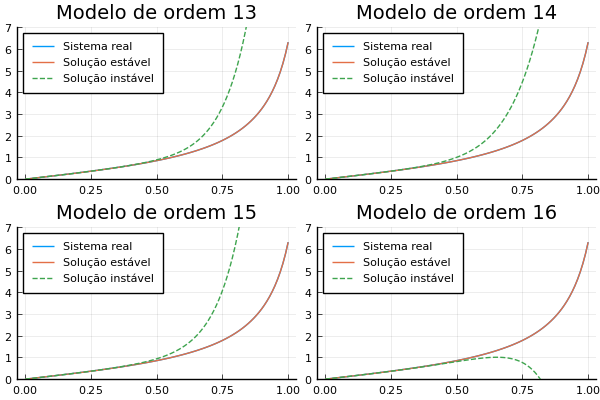

In [14]:
my_plots = Tuple(my_plots)
plot(my_plots[13], 
    my_plots[14], 
    my_plots[15], 
    my_plots[16], layout=(2,2))

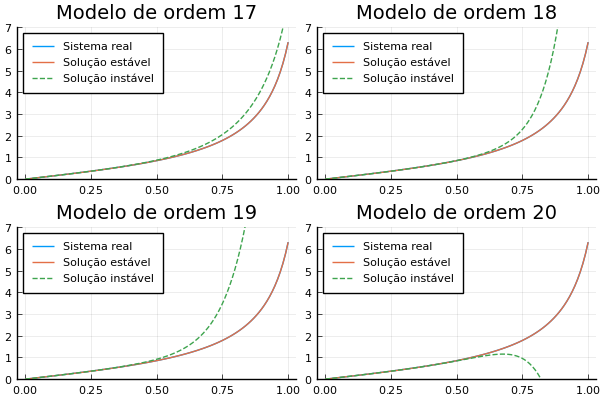

In [15]:
my_plots = Tuple(my_plots)
plot(my_plots[17], 
    my_plots[18], 
    my_plots[19], 
    my_plots[20], layout=(2,2))

Os dados das soluções para todas as ordens de modelo constam nas tabelas a seguir. 

In [18]:
using Formatting

printfmtln("{:<6s} || {:<45s} || {:<45s}",
"", "               SOLUÇÃO INSTáVEL", "               SOLUÇÃO ESTáVEL")
printfmtln("{:<6s} || {:<14s} | {:<14s} | {:<11s} || {:<14s} | {:<14s} | {:<11s}",
"Ordem", "Função Custo", "Erro RMS", "R2", "Função Custo", "Erro RMS", "R2")

println("-"^104)

for row=1:20
    printfmtln("{:<6} || {:3.8e} | {:3.8e} | {:+3.4e} || {:3.8e} | {:3.8e} | {:+3.4e}",
    row, instavel[row, :erro_MS], instavel[row, :erro_RMS], instavel[row, :coef_R2],
    estavel[row, :erro_MS], estavel[row, :erro_RMS], estavel[row, :coef_R2]);
end

       ||                SOLUÇÃO INSTáVEL               ||                SOLUÇÃO ESTáVEL               
Ordem  || Função Custo   | Erro RMS       | R2          || Função Custo   | Erro RMS       | R2         
--------------------------------------------------------------------------------------------------------
1      || 4.38394103e-01 | 6.62113361e-01 | +7.6492e+01 || 4.38394103e-01 | 6.62113361e-01 | +7.6492e+01
2      || 1.31416210e-01 | 3.62513738e-01 | +9.2953e+01 || 1.31416210e-01 | 3.62513738e-01 | +9.2953e+01
3      || 3.67828126e-02 | 1.91788458e-01 | +9.8028e+01 || 3.67828126e-02 | 1.91788458e-01 | +9.8028e+01
4      || 1.03941715e-02 | 1.01951810e-01 | +9.9443e+01 || 1.03941715e-02 | 1.01951810e-01 | +9.9443e+01
5      || 2.90466400e-03 | 5.38949348e-02 | +9.9844e+01 || 2.90466400e-03 | 5.38949348e-02 | +9.9844e+01
6      || 8.08928494e-04 | 2.84416683e-02 | +9.9957e+01 || 8.08928494e-04 | 2.84416683e-02 | +9.9957e+01
7      || 2.24142666e-04 | 1.49713949e-02 | +9.9988e+01

É possível notar que a solução instável apresenta resultados gradativamente melhores com o aumento da ordem até a ordem 10. Depois disso, os resultados pioram devido a problemas de condicionamento numérico da matriz $M$. 

O coeficiente $R^2$ até atinge cerca de $100\%$ para $n=10$, porém em contrapartida chega a assumir valores negativos para modelos de ordem superior.

Já no caso dos modelos obtidos por meio da solução estável, os resultados apresentaram erros pequenos para todas as ordens levadas em consideração. Os resultados melhoraram continuamente com o aumento da ordem, tanto que é praticamente impossível discernir graficamente as saídas estimadas da saída real para modelos de ordem superior a 10. Isso também se comprova pelo coeficiente $R^2$ que permaneceu próximo de $100\%$ para todas as ordens acima de 10.


Para representar graficamente a evolução da qualidade dos modelos em função da ordem, foi plotado o gráfico a seguir do erro RMS em função da ordem do modelo. 

É possível reparar novamente que até a ordem 10 as soluções estável e instável apresentam comportamentos bastante semelhantes, porém a partir de $n=10$ a solução instável apresenta resultados piores até mesmo que o de seu modelo mais simples ($n=1$), enquanto a solução estável proporcionou erros cada vez menores.

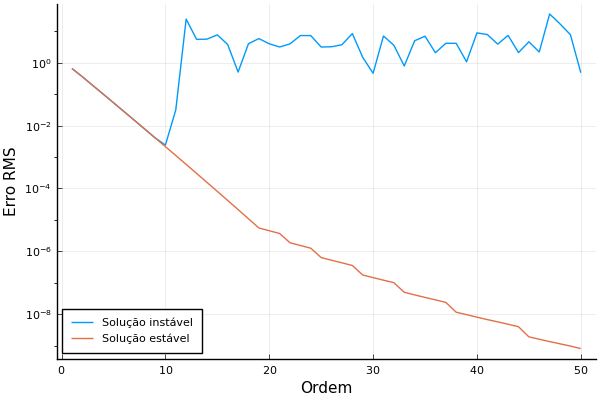

In [19]:
plt1 = plot(instavel.erro_RMS, label="Solução instável", xlabel="Ordem", ylabel="Erro RMS", yaxis=:log);
plot!(estavel.erro_RMS, label="Solução estável");

plot(plt1)